In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import os, gc
import warnings
warnings.filterwarnings("ignore")

import glob
import seaborn as sns

In [7]:
train_df = pd.read_csv('Dataset/train.csv')
test_df  = pd.read_csv('Dataset/test.csv')
sub_df   = pd.read_csv('Dataset/Sample_Submission.csv')
train_df.shape, test_df.shape, sub_df.shape

((5959, 3), (2553, 2), (5, 3))

In [8]:
train_df.head()

,Review Text,Review Title,topic
0,"Did nothing for me, didn't help lost even with...",Useless,Shipment and delivery
1,"Did nothing for me, didn't help lost even with...",Useless,Not Effective
2,I have bought these bags and immediately open...,TRASH!!! Do not buy these bags it’s a waist of...,Customer Service
3,Gave me an allergic reaction on my face :(,Do not recommend,Allergic
4,These don't compare to the name brand wipes. F...,Can't tackle big messes,Texture


In [11]:
train_df['topic'].unique().shape

(21,)

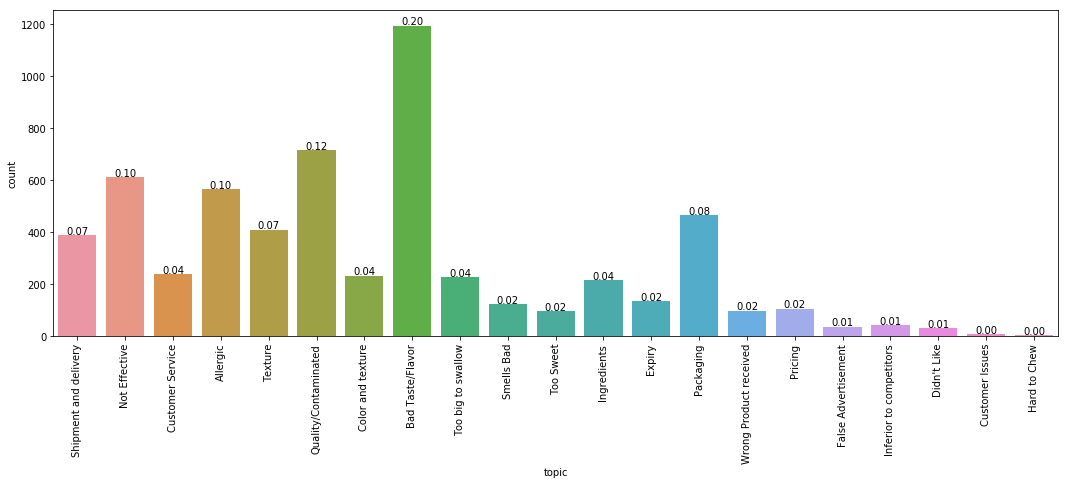

In [39]:
fig, ax = plt.subplots(figsize=(18, 6))
sns.countplot(train_df['topic'], ax=ax)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
total = train_df.shape[0]
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3, '{:1.2f}'.format(height/total), ha="center") 

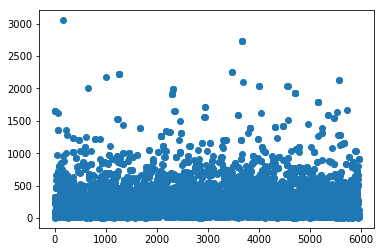

In [42]:
train_df['len'] = train_df['Review Text'].apply(len)
plt.scatter(range(train_df.shape[0]), train_df['len'])

In [78]:
def get_quantile(df, col, q1, q2):
    """compute quantile range
    args:
        col: col name
        q1: lower quantile percentile
        q2: upper quantile percentile
    """
    df1 = df[[col]].dropna()
    lower_bound = np.percentile(df1, q=q1)
    upper_bound = np.percentile(df1, q=q2)
    lower_bound = np.round(lower_bound,3)
    upper_bound = np.round(upper_bound, 3)
    min_ = np.round(np.min(df1[col]), 3)
    max_ = np.round(np.max(df1[col]), 3)
    print("Col: {4:<15} min: {0:<10} max: {1:<10} low: {2:<10} high: {3:<10}".format(min_, max_, lower_bound, upper_bound, col))

get_quantile(train_df, 'len', 5, 95)
get_quantile(train_df, 'len', 1, 96)
get_quantile(train_df, 'len', 1, 97)
get_quantile(train_df, 'len', 1, 98)
get_quantile(train_df, 'len', 1, 99)

Col: len             min: 3          max: 3052       low: 27.0       high: 839.2     
Col: len             min: 3          max: 3052       low: 13.0       high: 891.0     
Col: len             min: 3          max: 3052       low: 13.0       high: 1000.0    
Col: len             min: 3          max: 3052       low: 13.0       high: 1163.0    
Col: len             min: 3          max: 3052       low: 13.0       high: 1420.0    


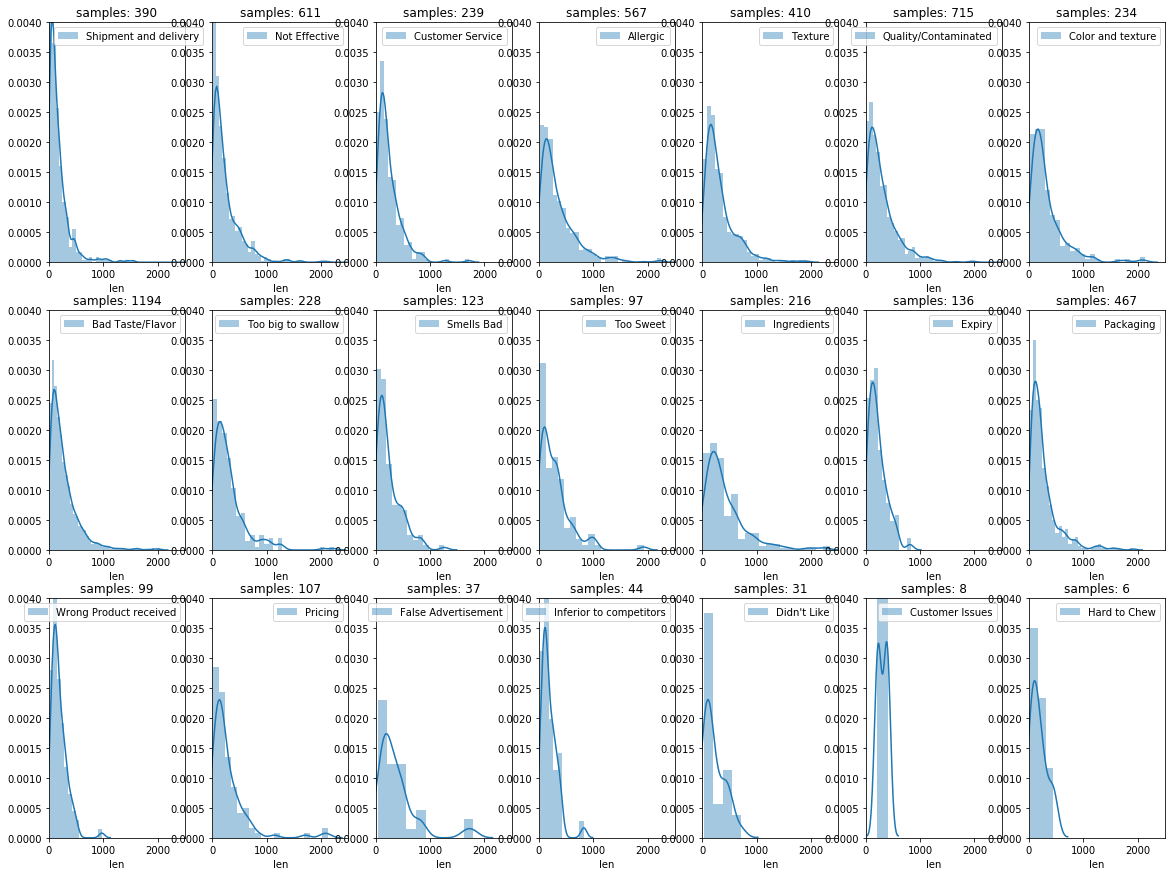

In [77]:
fig, ax = plt.subplots(3,7, figsize=(20,15))
axes = ax.flatten()
all_topics = list(train_df['topic'].unique())
for topic, ax_ in zip(all_topics, axes):
    sns.distplot(train_df[train_df['topic'] == topic]['len'], label=topic, ax=ax_)
    ax_.legend()
    ax_.set_title('samples: '+str(train_df[train_df['topic'] == topic].shape[0]))
    ax_.set_xlim([0,2500])
    ax_.set_ylim([0., 0.0040])

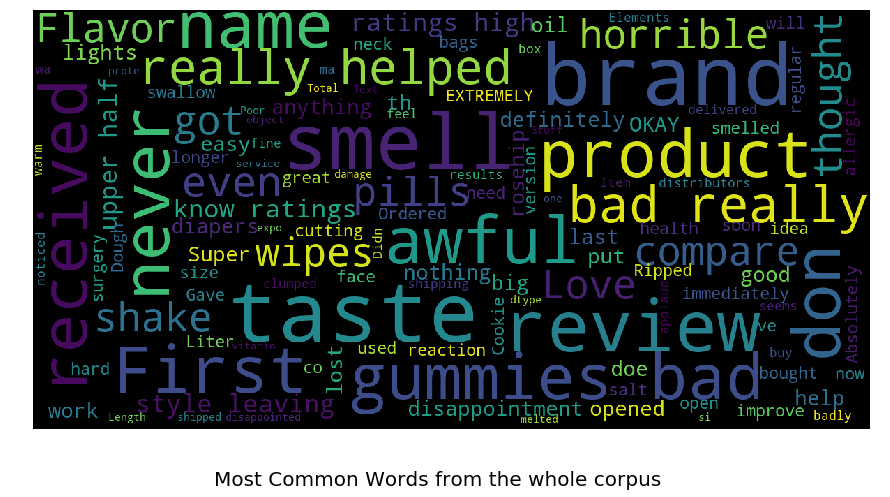

In [83]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
    return wordcloud


wc1 = show_wordcloud(train_df['Review Text'],'Most Common Words from the whole corpus')


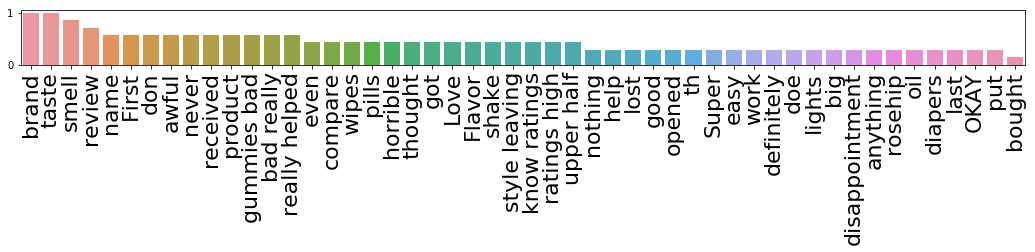

In [107]:
fig, ax = plt.subplots(figsize=(18, 1))
sns.barplot(list(wc1.words_.keys())[:50], list(wc1.words_.values())[:50], ax=ax)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
    tick.set_fontsize(22)

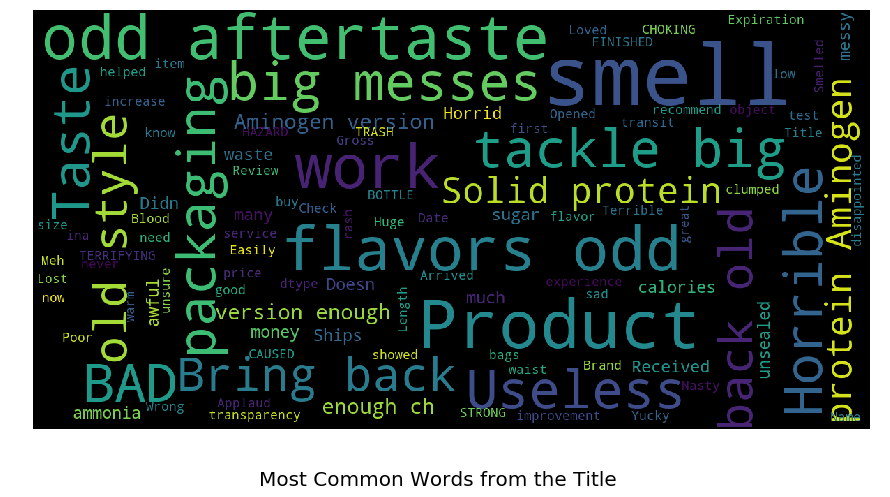

In [108]:
wc1 = show_wordcloud(train_df['Review Title'],'Most Common Words from the Title')


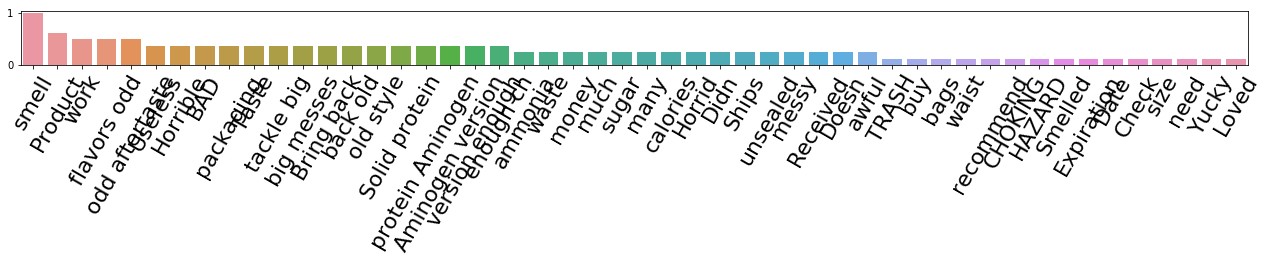

In [112]:
fig, ax = plt.subplots(figsize=(22, 1))
sns.barplot(list(wc1.words_.keys())[:50], list(wc1.words_.values())[:50], ax=ax)
for tick in ax.get_xticklabels():
    tick.set_rotation(60)
    tick.set_fontsize(22)